<a href="https://colab.research.google.com/github/VavRe/information-retrieval-ut/blob/main/CA6/IR_CA6_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("./drive/MyDrive/IR/spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df["v1"].replace(["ham","spam"],[0,1],inplace=True)
X = df["v2"].values
y = df["v1"].values
print(X.shape, y.shape)

(5572,) (5572,)


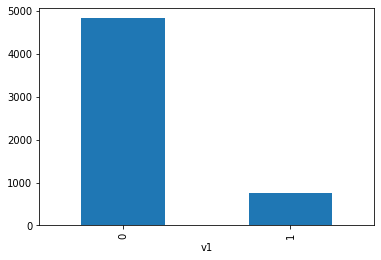

In [ ]:
df.groupby('v1')['v1'].count().plot(kind="bar")

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
tokenized_X = [word_tokenize(sample) for  sample in X]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
ps = PorterStemmer()
nonstop_tokenized_X = tokenized_X.copy()
for idx, sentence in enumerate(tokenized_X):
  nonstop_tokenized_X[idx] = [ps.stem(word) for word in sentence if not word.lower() in stop_words and not re.search('[0-9]', word) ]
  print(f" on {idx} : { len(tokenized_X[idx]) - len(nonstop_tokenized_X[idx])} words removed")
  print("============")

Streaming output truncated to the last 5000 lines.
 on 3072 : 3 words removed
 on 3073 : 3 words removed
 on 3074 : 3 words removed
 on 3075 : 10 words removed
 on 3076 : 6 words removed
 on 3077 : 5 words removed
 on 3078 : 14 words removed
 on 3079 : 4 words removed
 on 3080 : 16 words removed
 on 3081 : 9 words removed
 on 3082 : 3 words removed
 on 3083 : 10 words removed
 on 3084 : 1 words removed
 on 3085 : 20 words removed
 on 3086 : 5 words removed
 on 3087 : 6 words removed
 on 3088 : 4 words removed
 on 3089 : 4 words removed
 on 3090 : 11 words removed
 on 3091 : 4 words removed
 on 3092 : 1 words removed
 on 3093 : 6 words removed
 on 3094 : 14 words removed
 on 3095 : 7 words removed
 on 3096 : 4 words removed
 on 3097 : 7 words removed
 on 3098 : 1 words removed
 on 3099 : 8 words removed
 on 3100 : 0 words removed
 on 3101 : 8 words removed
 on 3102 : 2 words removed
 on 3103 : 7 words removed
 on 3104 : 5 words removed
 on 3105 : 37 words removed
 on 3106 : 12 words rem

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenizer = TreebankWordDetokenizer()
preprocessed_X = [ detokenizer.detokenize(sample) for sample in nonstop_tokenized_X]


In [ ]:
X[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
preprocessed_X[2]

"free entri wkli comp win fa cup final tkt may . text fa receiv entri question (std txt rate) & c's appli 's"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(preprocessed_X,y,test_size=0.2)
print(np.array(X_train).shape,np.array(y_train).shape,np.array(X_test).shape,np.array(y_test).shape)

(4457,) (4457,) (1115,) (1115,)


In [ ]:
max_features = 5000

## Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=max_features)
count_vectorizer_matrix = count_vectorizer.fit_transform(X_train)
len(count_vectorizer.vocabulary_)

5000

## Bigram Vectorization


In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=max_features)
bigram_vectorizer_matrix = bigram_vectorizer.fit_transform(X_train)
len(bigram_vectorizer.vocabulary_)

5000

## Trigram Vectorization

In [ ]:
trigram_vectorizer = CountVectorizer(ngram_range=(1,3),max_features=max_features)
trigram_vectorizer_matrix = trigram_vectorizer.fit_transform(X_train)
len(trigram_vectorizer.vocabulary_)

5000

## TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectorizer_matrix = tfidf_vectorizer.fit_transform(X_train)
len(tfidf_vectorizer.vocabulary_)

5000

In [ ]:
X_train_count_vectorized = count_vectorizer.transform(X_train)
X_test_count_vectorized = count_vectorizer.transform(X_test)
X_train_bigram_vectorized = bigram_vectorizer.transform(X_train)
X_test_bigram_vectorized = bigram_vectorizer.transform(X_test)
X_train_trigram_vectorized = trigram_vectorizer.transform(X_train)
X_test_trigram_vectorized = trigram_vectorizer.transform(X_test)
X_train_tfidf_vectorized = tfidf_vectorizer.transform(X_train)
X_test_tfidf_vectorized = tfidf_vectorizer.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
count_reg = LogisticRegression().fit(X_train_count_vectorized, y_train)
bi_reg = LogisticRegression().fit(X_train_bigram_vectorized, y_train)
tri_reg = LogisticRegression().fit(X_train_trigram_vectorized, y_train)
tfidf_reg = LogisticRegression().fit(X_train_tfidf_vectorized, y_train)

## SVM 

In [ ]:
from sklearn.svm import SVC
count_svm = SVC().fit(X_train_count_vectorized, y_train)
bigram_svm = SVC().fit(X_train_bigram_vectorized, y_train)
trigram_svm = SVC().fit(X_train_trigram_vectorized, y_train)
tfidf_svm = SVC().fit(X_train_tfidf_vectorized, y_train)

## Naive Bayes

### Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
count_nb_mnb = MultinomialNB().fit(X_train_count_vectorized, y_train)
bigram_nb_mnb = MultinomialNB().fit(X_train_bigram_vectorized, y_train)
trigram_nb_mnb = MultinomialNB().fit(X_train_trigram_vectorized, y_train)
tfidf_nb_mnb = MultinomialNB().fit(X_train_tfidf_vectorized, y_train)


### Gaussian

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# count_nb_gnb = GaussianNB().fit(X_train_count_vectorized, y_train)
# bigram_nb_gnb = GaussianNB().fit(X_train_bigram_vectorized, y_train)
# trigram_nb_gnb = GaussianNB().fit(X_train_trigram_vectorized, y_train)
# tfidf_nb_gnb = GaussianNB().fit(X_train_tfidf_vectorized, y_train)


# Evaluation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,make_scorer

def evaluate_model(model,X_train,y_train):

  scoring = {
              'precision_macro': make_scorer(precision_score, average='macro'),
              'precision_weighted': make_scorer(precision_score, average='weighted'),
              'accuracy': make_scorer(accuracy_score),
              'recall_macro': make_scorer(recall_score, average='macro'),
              'recall_weighted': make_scorer(recall_score, average='weighted'),
              'F1_macro': make_scorer(f1_score, average='macro'),
              'F1_weighted': make_scorer(f1_score, average='weighted'),      
              }
  scores = cross_validate(model, X_train.toarray(), y_train, scoring=scoring, cv=5)
  return scores

## SVM

In [ ]:
model_svm = SVC()
scores_count_svm = evaluate_model(model_svm,X_train_count_vectorized,y_train)
scores_bi_svm = evaluate_model(model_svm,X_train_bigram_vectorized,y_train)
scores_tri_svm = evaluate_model(model_svm,X_train_trigram_vectorized,y_train)
scores_tfidf_svm =  evaluate_model(model_svm,X_train_tfidf_vectorized,y_train)

## Logistic Regression

In [ ]:
model_reg = LogisticRegression()
scores_count_reg = evaluate_model(model_reg,X_train_count_vectorized,y_train)
scores_bi_reg = evaluate_model(model_reg,X_train_bigram_vectorized,y_train)
scores_tri_reg = evaluate_model(model_reg,X_train_trigram_vectorized,y_train)
scores_tfidf_reg =  evaluate_model(model_reg,X_train_tfidf_vectorized,y_train)


## Naive Bayes

In [ ]:
model_nb_mn = MultinomialNB()
scores_count_nb_mn = evaluate_model(model_nb_mn,X_train_count_vectorized,y_train)
scores_bi_nb_mn = evaluate_model(model_nb_mn,X_train_bigram_vectorized,y_train)
scores_tri_nb_mn = evaluate_model(model_nb_mn,X_train_trigram_vectorized,y_train)
scores_tfidf_nb_mn =  evaluate_model(model_nb_mn,X_train_tfidf_vectorized,y_train)

In [ ]:
scores_tri_reg

{'fit_time': array([1.07759023, 1.35324073, 1.31498861, 1.22850323, 1.22083902]),
 'score_time': array([0.02131987, 0.04053664, 0.04369044, 0.04167962, 0.0203464 ]),
 'test_precision_macro': array([0.97888442, 0.98102405, 0.98099146, 0.97807369, 0.98235777]),
 'test_precision_weighted': array([0.97763939, 0.98094485, 0.97459637, 0.97651204, 0.97675691]),
 'test_accuracy': array([0.97757848, 0.9809417 , 0.97418631, 0.97643098, 0.97643098]),
 'test_recall_macro': array([0.92307609, 0.93568113, 0.90613283, 0.91819786, 0.91531872]),
 'test_recall_weighted': array([0.97757848, 0.9809417 , 0.97418631, 0.97643098, 0.97643098]),
 'test_F1_macro': array([0.94855291, 0.95677001, 0.93917276, 0.94533694, 0.94533694]),
 'test_F1_weighted': array([0.97688533, 0.98047059, 0.97309861, 0.97564437, 0.97555183])}

In [ ]:
scores_count_nb_mn

{'fit_time': array([0.43991399, 0.45542216, 0.39981174, 0.40326905, 0.39993572]),
 'score_time': array([0.0303309 , 0.02348757, 0.02302098, 0.02423429, 0.02329445]),
 'test_precision_macro': array([0.93063326, 0.92408293, 0.92203548, 0.94561811, 0.91466661]),
 'test_precision_weighted': array([0.9728774 , 0.97395581, 0.96973993, 0.97794818, 0.96664029]),
 'test_accuracy': array([0.97197309, 0.97197309, 0.96857464, 0.97755331, 0.96520763]),
 'test_recall_macro': array([0.95183559, 0.96250014, 0.94598417, 0.95833973, 0.94082814]),
 'test_recall_weighted': array([0.97197309, 0.97197309, 0.96857464, 0.97755331, 0.96520763]),
 'test_F1_macro': array([0.94085743, 0.94204526, 0.93352022, 0.95184825, 0.92714924]),
 'test_F1_weighted': array([0.97230974, 0.97258005, 0.96900807, 0.97771125, 0.9657395 ])}

In [ ]:
scores = {
    "scores_count_nb_mn":scores_count_nb_mn,
    "scores_bi_nb_mn":scores_bi_nb_mn,
    "scores_tri_nb_mn":scores_tri_nb_mn,
    "scores_tfidf_nb_mn":scores_tfidf_nb_mn,
    "scores_count_reg":scores_count_reg,
    "scores_bi_reg":scores_bi_reg,
    "scores_tri_reg":scores_tri_reg,
    "scores_tfidf_reg":scores_tfidf_reg,
    "scores_count_svm":scores_count_svm,
    "scores_bi_svm":scores_bi_svm,
    "scores_tri_svm":scores_tri_svm,
    "scores_tfidf_svm":scores_tfidf_svm
}

for key,value in scores.items():
  print(f"Method is : {key} ")
  [print(f"{metric} : {values.mean()}")  for metric, values in value.items() ]
  print("=======")

Method is : scores_count_nb_mn 
fit_time : 0.41967053413391114
score_time : 0.024873638153076173
test_precision_macro : 0.9274072804135258
test_precision_weighted : 0.9722323236644856
test_accuracy : 0.9710563532686104
test_recall_macro : 0.9518975527457231
test_recall_weighted : 0.9710563532686104
test_F1_macro : 0.9390840807979242
test_F1_weighted : 0.9714697251944265
Method is : scores_bi_nb_mn 
fit_time : 0.4163517475128174
score_time : 0.024215221405029297
test_precision_macro : 0.9677864186317636
test_precision_weighted : 0.9814223549623418
test_accuracy : 0.9816015159064486
test_recall_macro : 0.9515598434429275
test_recall_weighted : 0.9816015159064486
test_F1_macro : 0.959432906086709
test_F1_weighted : 0.9814399954180086
Method is : scores_tri_nb_mn 
fit_time : 0.4201310157775879
score_time : 0.023249721527099608
test_precision_macro : 0.9713266908503237
test_precision_weighted : 0.9807102085570489
test_accuracy : 0.9809288701665384
test_recall_macro : 0.9447519855366828
test